In [69]:
#importing packages
import fastf1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [70]:
import pandas as pd
import numpy as np

def extract_driver_metrics(session):
    """Extracts aggression and smoothness metrics for each driver in a given F1 session."""
    
    session.load()
    laps = session.laps
    drivers = session.drivers
    driver_metrics = {}

    for driver in drivers:
        driver_laps = laps.pick_drivers(driver)

        try:
            telemetry = session.car_data[driver]  # Fetch telemetry
        except Exception as e:
            print(f"⚠️ Could not load telemetry for {driver}: {e}")
            continue

        if telemetry.empty:
            print(f"⚠️ No telemetry data for {driver}. Skipping...")
            continue

        # Convert lap times to seconds
        driver_laps['LapTime'] = driver_laps['LapTime'].dt.total_seconds()
        driver_laps['Sector1Time'] = driver_laps['Sector1Time'].dt.total_seconds()
        driver_laps['Sector2Time'] = driver_laps['Sector2Time'].dt.total_seconds()
        driver_laps['Sector3Time'] = driver_laps['Sector3Time'].dt.total_seconds()

        # Attack Index (Aggression)
        overtakes = driver_laps['Position'].diff().abs().sum()
        braking_gs = telemetry['Brake'].mean() if 'Brake' in telemetry.columns else np.nan
        throttle_var = telemetry['Throttle'].std() if 'Throttle' in telemetry.columns else np.nan
        drs_usage = telemetry['DRS'].sum()
        sector_var = driver_laps[['Sector1Time', 'Sector2Time', 'Sector3Time']].std().mean()
        track_limits = driver_laps['TrackStatus'].apply(lambda x: 1 if x == 2 else 0).sum()

        # Finesse Factor (Smoothness)
        lap_var = driver_laps['LapTime'].std()
        tire_wear = driver_laps['LapTime'].diff().mean()
        throttle_smoothness = telemetry['Throttle'].mean() if 'Throttle' in telemetry.columns else np.nan
        braking_consistency = telemetry['Brake'].std() if 'Brake' in telemetry.columns else np.nan
        steering_smoothness = telemetry['Steer'].std() if 'Steer' in telemetry.columns else np.nan

        driver_metrics[driver] = {
            "Overtakes": overtakes,
            "Braking_Gs": braking_gs,
            "Throttle_Variability": throttle_var,
            "DRS_Usage": drs_usage,
            "Sector_Variability": sector_var,
            "Track_Limit_Violations": track_limits,
            "Lap_Time_Variability": lap_var,
            "Tire_Wear": tire_wear,
            "Throttle_Smoothness": throttle_smoothness,
            "Braking_Consistency": braking_consistency,
            "Steering_Smoothness": steering_smoothness
        }

    return pd.DataFrame.from_dict(driver_metrics, orient='index')

In [72]:
race_calendar = [
    "Bahrain", "Saudi Arabia", "Australia", "Japan", "China", "Miami", 
    "Imola", "Monaco", "Canada", "Spain", "Austria", "Britain", 
    "Hungary", "Belgium", "Netherlands", "Italy", "Azerbaijan", "Singapore", 
    "USA", "Mexico", "Brazil", "Las Vegas", "Qatar", "Abu Dhabi"
]

# Step 1: Collect data from all races
all_race_data = []

for race in race_calendar:
    print(f"Processing {race} GP...")
    session = fastf1.get_session(2024, race, 'R')
    session.load()

    driver_metrics = extract_driver_metrics(session)

    if driver_metrics.empty:
        print(f"⚠️ No valid data for {race}. Skipping...")
        continue

    all_race_data.append(driver_metrics)

print(all_race_data)

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Processing Bahrain GP...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req       

Processing Saudi Arabia GP...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '81', '14', '63', '38', '4', '44', '27', '23', '20', '31', '2', '22', '3', '77', '24', '18', '10']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req 

Processing Australia GP...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['55', '16', '4', '81', '11', '18', '22', '14', '27', '20', '23', '3', '10', '77', '24', '31', '63', '44', '1']
core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
r

Processing Japan GP...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '4', '14', '63', '81', '44', '22', '27', '18', '20', '77', '31', '10', '2', '24', '3', '23']
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_dat

Processing China GP...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '11', '16', '55', '63', '14', '81', '44', '27', '31', '23', '10', '24', '18', '20', '2', '3', '22', '77']
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data

Processing Miami GP...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '16', '11', '55', '44', '22', '63', '14', '31', '27', '10', '81', '24', '3', '77', '18', '23', '20', '2']
core           INFO 	Loading data for Miami Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
r

Processing Imola GP...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '16', '81', '55', '44', '63', '11', '18', '22', '27', '20', '3', '31', '24', '10', '2', '77', '14', '23']
core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_stat

Processing Monaco GP...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data


Processing Canada GP...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '63', '44', '81', '14', '18', '3', '10', '31', '27', '20', '77', '22', '24', '55', '23', '11', '16', '2']
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_dat

Processing Spain GP...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '63', '16', '55', '81', '11', '10', '31', '27', '14', '24', '18', '3', '77', '20', '23', '22', '2']
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data

Processing Austria GP...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '81', '55', '44', '1', '27', '11', '20', '3', '10', '16', '31', '18', '22', '23', '77', '24', '14', '2', '4']
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req      

Processing Britain GP...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '1', '4', '81', '55', '27', '18', '14', '23', '22', '2', '20', '3', '16', '77', '31', '11', '24', '63', '10']
core           INFO 	Loading data for British Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req       

Processing Hungary GP...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '44', '16', '1', '55', '11', '63', '22', '18', '14', '3', '27', '23', '20', '77', '2', '31', '24', '10']
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req     

Processing Belgium GP...


req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '81', '16', '1', '4', '55', '11', '14', '31', '3', '18', '23', '10', '20', '77', '22', '2', '27', '24', '63']
core           INFO 	Loading data for Belgian Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_da

Processing Netherlands GP...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '16', '81', '55', '11', '63', '44', '10', '14', '27', '3', '18', '23', '31', '2', '22', '20', '77', '24']
core           INFO 	Loading data for Dutch Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req         

Processing Italy GP...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']
core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req      

Processing Azerbaijan GP...


req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '16', '63', '4', '1', '14', '23', '43', '44', '50', '27', '10', '3', '24', '31', '77', '11', '55', '18', '22']
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data

Processing Singapore GP...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '81', '63', '16', '44', '55', '14', '27', '11', '43', '22', '31', '18', '24', '77', '10', '3', '20', '23']
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req    

Processing USA GP...


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
_api        WARNING 	Driver  2: Position data is incomplete!
_api        WARNING 	Driver  3: Position data is inco

Processing Mexico GP...


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Processing Brazil GP...


core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.5.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data

Processing Las Vegas GP...


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Processing Qatar GP...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '81', '63', '10', '55', '14', '24', '20', '4', '77', '44', '22', '30', '23', '27', '11', '18', '43', '31']
core           INFO 	Loading data for Qatar Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req       

Processing Abu Dhabi GP...


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

[    Overtakes  Braking_Gs  Throttle_Variability  DRS_Usage  \
1         0.0    0.143169             46.003712       5321   
11       14.0    0.146673             46.247379      14581   
55       12.0    0.265401             46.793166      30111   
16       26.0    0.272294             45.606483      35767   
63       30.0    0.231770             46.816574      12348   
4        19.0    0.261466             46.245418      12015   
44       16.0    0.241190             46.330728      17126   
81       20.0    0.242080             46.626801      12126   
14       31.0    0.243746             46.622885      21148   
18       27.0    0.247997             46.487210      19784   
24       28.0    0.225796             46.672284      24568   
20       20.0    0.269565             47.189141      28386   
3        25.0    0.145294             45.519791      24287   
22       26.0    0.151526             45.850785      28320   
23       28.0    0.271978             46.522077      27647   
27     

In [74]:
raw_metric_per_race = dict(zip(race_calendar, all_race_data))
print(raw_metric_per_race)

{'Bahrain':     Overtakes  Braking_Gs  Throttle_Variability  DRS_Usage  \
1         0.0    0.143169             46.003712       5321   
11       14.0    0.146673             46.247379      14581   
55       12.0    0.265401             46.793166      30111   
16       26.0    0.272294             45.606483      35767   
63       30.0    0.231770             46.816574      12348   
4        19.0    0.261466             46.245418      12015   
44       16.0    0.241190             46.330728      17126   
81       20.0    0.242080             46.626801      12126   
14       31.0    0.243746             46.622885      21148   
18       27.0    0.247997             46.487210      19784   
24       28.0    0.225796             46.672284      24568   
20       20.0    0.269565             47.189141      28386   
3        25.0    0.145294             45.519791      24287   
22       26.0    0.151526             45.850785      28320   
23       28.0    0.271978             46.522077      27647

In [77]:
def load_all_metrics():
    """Loads all stored race data into a list of DataFrames."""
    race_calendar = ["Bahrain", "Saudi Arabia", "Australia", "Japan", "China", "Miami"]
    all_race_data = []

    for race in race_calendar:
        file_path = f"race_data/{race}_metrics.csv"
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, index_col=0)
            all_race_data.append(df)

    return all_race_data

def standardize_metrics(all_race_data):
    """Standardizes data across all races using a single scaler."""
    global_scaler = StandardScaler()

    # Combine all race data
    combined_data = pd.concat(all_race_data, axis=0)

    # Fit global scaler
    global_scaler.fit(combined_data)

    # Transform each race dataset using the same scaler
    standardized_race_data = [pd.DataFrame(global_scaler.transform(df), columns=df.columns, index=df.index) for df in all_race_data]

    return standardized_race_data

def apply_pca_fixed_range(df_metrics):
    """Applies PCA and normalizes output to ensure a fixed -3 to 3 range."""
    if df_metrics.empty:
        print("⚠️ No valid driver metrics to process.")
        return None

    # ✅ Replace NaN values with column mean (or 0 if the entire column is NaN)
    df_metrics.fillna(df_metrics.mean(numeric_only=True), inplace=True)
    df_metrics.fillna(0, inplace=True)  # If still NaN, replace with 0

    # ✅ Ensure at least 2 numeric columns for PCA
    if df_metrics.shape[1] < 2:
        print("⚠️ Not enough valid data for PCA. Skipping...")
        return None

    pca = PCA(n_components=2)
    pca_scores = pca.fit_transform(df_metrics)

    # ✅ Fix division by zero issue in normalization
    min_attack, max_attack = min(pca_scores[:, 0]), max(pca_scores[:, 0])
    min_finesse, max_finesse = min(pca_scores[:, 1]), max(pca_scores[:, 1])

    if max_attack - min_attack == 0:
        attack_index = np.zeros_like(pca_scores[:, 0])  # Avoid division by zero
    else:
        attack_index = 6 * (pca_scores[:, 0] - min_attack) / (max_attack - min_attack) - 3

    if max_finesse - min_finesse == 0:
        finesse_factor = np.zeros_like(pca_scores[:, 1])  # Avoid division by zero
    else:
        finesse_factor = 6 * (pca_scores[:, 1] - min_finesse) / (max_finesse - min_finesse) - 3

    df_metrics['Attack_Index'] = attack_index
    df_metrics['Finesse_Factor'] = finesse_factor

    return df_metrics[['Attack_Index', 'Finesse_Factor']]


def convert_to_0_100_scale(df_metrics):
    """Maps -3 to 3 range into a 0-100 scale."""
    df_metrics['Attack_Index'] = ((df_metrics['Attack_Index'] + 3) / 6) * 100
    df_metrics['Finesse_Factor'] = ((df_metrics['Finesse_Factor'] + 3) / 6) * 100
    return df_metrics

In [78]:
standardized_race_data = standardize_metrics(all_race_data)
pca_fixed_race_data = [apply_pca_fixed_range(df) for df in standardized_race_data]
final_race_data = [convert_to_0_100_scale(df) for df in pca_fixed_race_data]

# Store final results per race
race_calendar = [
    "Bahrain", "Saudi Arabia", "Australia", "Japan", "China", "Miami", 
    "Imola", "Monaco", "Canada", "Spain", "Austria", "Britain", 
    "Hungary", "Belgium", "Netherlands", "Italy", "Azerbaijan", "Singapore", 
    "USA", "Mexico", "Brazil", "Las Vegas", "Qatar", "Abu Dhabi"
]
season_results = {race: df for race, df in zip(race_calendar, final_race_data)}

print("✅ Standardization and PCA complete!")

✅ Standardization and PCA complete!


C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\Hp\AppData\Local\Temp\ipykernel_11608\3661275721.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metrics['Attack_Index'] =

In [101]:
import fastf1

def get_driver_mapping_2024():
    """Extracts a global mapping of all drivers who participated in the 2024 season."""
    fastf1.Cache.enable_cache("f1_cache")  # Enable caching

    driver_mapping = {}

    # ✅ Loop through all races in 2024
    schedule = fastf1.get_event_schedule(2024)
    race_events = schedule[schedule["EventFormat"] == "conventional"]  # Ignore sprints, test sessions

    for _, event in race_events.iterrows():
        race_name = event["EventName"]
        session = fastf1.get_session(2024, race_name, "R")
        session.load()

        # ✅ Check available columns
        if "DriverNumber" in session.results.columns and "Abbreviation" in session.results.columns:
            for _, row in session.results.iterrows():
                car_number = int(row["DriverNumber"])  # ✅ Use "DriverNumber" instead of "RacingNumber"
                abbreviation = row["Abbreviation"]
                driver_mapping[car_number] = abbreviation  # Store globally

    return driver_mapping

# ✅ Get and store the 2024 driver mapping
global_driver_mapping = get_driver_mapping_2024()

# 🔍 Check what we got
print(global_driver_mapping)  # {1: "VER", 44: "HAM", 16: "LEC", ...}

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
core           INFO 	Loading data for Saudi Arabian Grand Prix

{1: 'VER', 11: 'PER', 55: 'SAI', 16: 'LEC', 63: 'RUS', 4: 'NOR', 44: 'HAM', 81: 'PIA', 14: 'ALO', 18: 'STR', 24: 'ZHO', 20: 'MAG', 3: 'RIC', 22: 'TSU', 23: 'ALB', 27: 'HUL', 31: 'OCO', 10: 'GAS', 77: 'BOT', 2: 'SAR', 38: 'BEA', 43: 'COL', 50: 'BEA', 30: 'LAW', 61: 'DOO'}


### driver style plotted

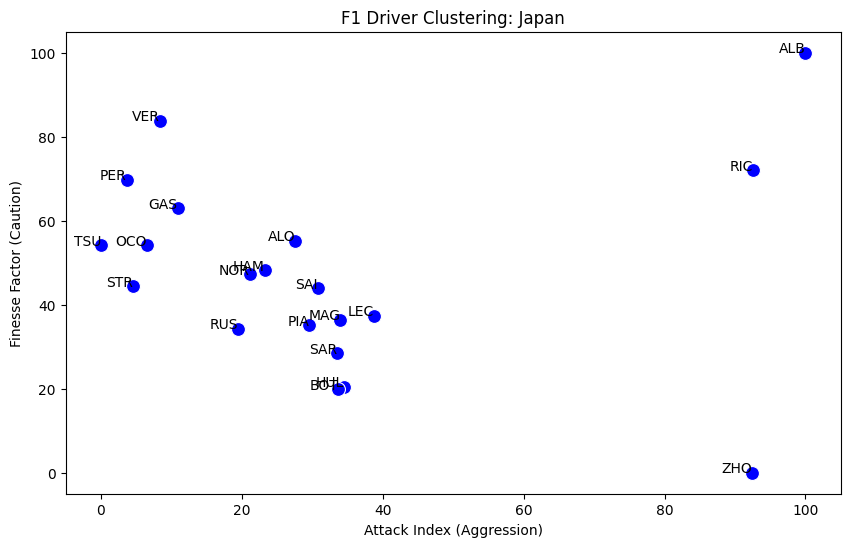

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_driver_scores(race_name):
    """Plots drivers' Attack Index vs. Finesse Factor using driver codes for labels."""
    if race_name not in season_results:
        print(f"⚠️ No data available for {race_name}.")
        return

    df = season_results[race_name]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['Attack_Index'], y=df['Finesse_Factor'], s=100, color='blue')

    # ✅ Annotate each point using the global driver mapping
    for car_number, row in df.iterrows():
        driver_code = global_driver_mapping.get(int(car_number), str(car_number))  # Fallback to car number if missing
        plt.text(row['Attack_Index'], row['Finesse_Factor'], driver_code, fontsize=10, ha='right')

    plt.xlabel("Attack Index (Aggression)")
    plt.ylabel("Finesse Factor (Caution)")
    plt.title(f"F1 Driver Clustering: {race_name}")

    plt.show()

# ✅ Example: Plot for Bahrain GP
plot_driver_scores("Japan")


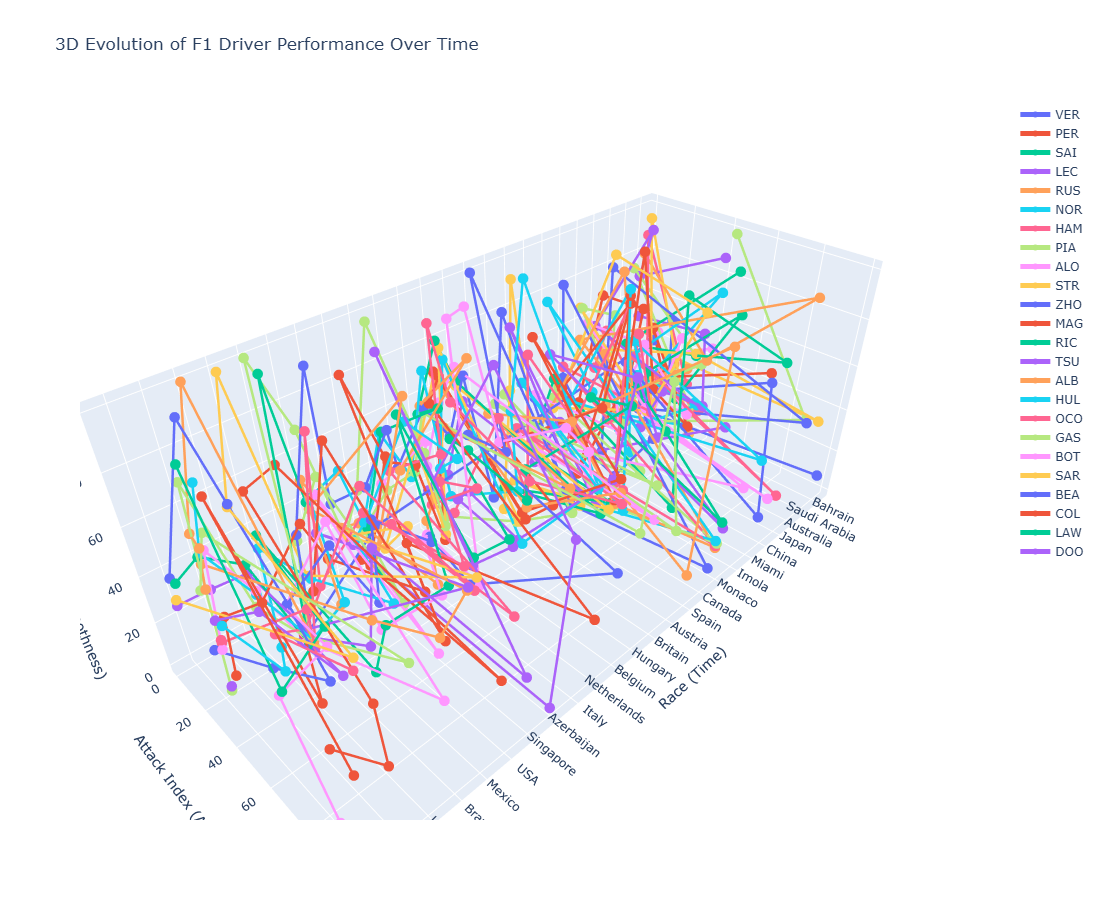

In [119]:
import plotly.graph_objects as go
import pandas as pd

def plot_3d_driver_progression(season_results, race_spacing=5):
    """Creates an improved interactive 3D line plot showing driver progression over time."""

    # ✅ Convert race names to a spaced-out sequential number for the X-axis
    race_list = list(season_results.keys())  # Race names in chronological order
    race_mapping = {race: i * race_spacing for i, race in enumerate(race_list)}  # Increase spacing between races

    # ✅ Combine all race data into a single DataFrame
    all_data = []
    for race, df in season_results.items():
        df = df.copy()
        df["Race"] = race  # Store race name for labels
        df["RaceIndex"] = race_mapping[race]  # Assign spaced-out numerical time value (X-axis)
        all_data.append(df)

    full_df = pd.concat(all_data)  # Merge all races

    # ✅ Map Car Numbers to Driver Codes for Labels
    full_df["Driver"] = full_df.index.map(lambda num: global_driver_mapping.get(int(num), str(num)))

    # ✅ Create a 3D Figure
    fig = go.Figure()

    # ✅ Add a Line for Each Driver
    for driver in full_df["Driver"].unique():
        driver_df = full_df[full_df["Driver"] == driver]

        fig.add_trace(go.Scatter3d(
            x=driver_df["RaceIndex"],  # ✅ Races on X-axis
            y=driver_df["Attack_Index"],  # ✅ Attack Index on Y-axis
            z=driver_df["Finesse_Factor"],  # ✅ Finesse Factor on Z-axis
            mode="lines+markers",  # Lines + markers for visibility
            name=driver,  # Driver name in legend
            text=driver_df["Race"],  # Show race name on hover
            hoverinfo="text+name",
            line=dict(width=5),  # Make lines thicker
            marker=dict(size=6)  # Make markers bigger
        ))

    # ✅ Adjust layout: Wider & Taller
    fig.update_layout(
        scene=dict(
            xaxis_title="Race (Time)",
            yaxis_title="Attack Index (Aggression)",
            zaxis_title="Finesse Factor (Smoothness)",
            xaxis=dict(
                tickvals=list(race_mapping.values()),  # Set tick positions
                ticktext=list(race_mapping.keys()),  # Label races
            ),
        ),
        width=1500,  # ✅ Increase width
        height=900,  # ✅ Increase height for better visibility
        title="3D Evolution of F1 Driver Performance Over Time",
        autosize=False
    )

    fig.show()  # ✅ Display interactive 3D graph

# ✅ Run the function with spaced-out races
plot_3d_driver_progression(season_results, race_spacing=10)